In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import VAR

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [32]:
data = pd.read_csv('data/g_logs_defense.csv')
data.shape

(104165, 35)

## VAR Model - James Harden 

In [33]:
df = data[data['Player'] == 'Christian Wood']
df.index = pd.DatetimeIndex(df['Date'])
df.drop(columns='Date',inplace=True)
df.sort_index(inplace=True)
df.head()

,Season,Player,Team,Match-up,Home/Away,W/L,Min,Pts,FGM,FGA,...,Trip/Dub,OPP_DEF_RTG,OPP_DREB%,OPP_STL,OPP_BLK,OPP_PTS_off_TOV,OPP_PTS_2nd_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DK_SCORE
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-07,2016-17,Christian Wood,CHA,Indiana Pacers,0,1,3,0,0,1,...,0,108.1,71.3,8.2,5.0,16.2,12.9,10.6,39.7,2.50
2017-01-31,2016-17,Christian Wood,CHA,Portland Trailblazers,1,0,6,0,0,1,...,0,110.0,72.0,7.0,5.0,15.7,12.6,12.7,42.9,7.25
2017-02-01,2016-17,Christian Wood,CHA,Golden State Warriors,1,0,7,4,1,1,...,0,103.4,70.9,9.6,6.8,16.7,14.0,14.4,45.4,7.25
2017-02-25,2016-17,Christian Wood,CHA,Sacramento Kings,1,1,10,5,1,3,...,0,110.8,72.3,7.6,4.0,17.4,12.5,14.7,40.7,9.50
2017-02-26,2016-17,Christian Wood,CHA,Los Angeles Clippers,1,0,23,4,2,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.50


In [34]:
df = data[data['Player'] == 'Christian Wood']
df.index = pd.DatetimeIndex(df['Date'])
df.drop(columns='Date',inplace=True)
df.sort_index(inplace=True)

# Confirm Stationarity of the data 

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

# Check if draftkings is stationary

dk_test = interpret_dftest(adfuller(df['DK_SCORE']))

if dk_test[1] > .05:
    df['DK_SCORE'] = df['DK_SCORE'].diff(1)

# Check if points is stationary
pts_test = interpret_dftest(adfuller(df['Pts']))


if pts_test[1] > .05:
    df['Pts'] = df['Pts'].diff(1)

# Check if rebounds is stationary
reb_test = interpret_dftest(adfuller(df['REB']))

if reb_test[1] > .05:
    df['REB'] = df['REB'].diff(1)

# Check if assists is stationary 
ast_test = interpret_dftest(adfuller(df['AST']))

if ast_test[1] > .05:
    df['AST'] = df['AST'].diff(1)

df = df[['DK_SCORE','Pts','REB','AST']]

df.dropna(inplace=True)
train, test = train_test_split(df,shuffle=False, test_size = .25)

model = VAR(train)

ts_model = model.fit(maxlags=5,ic='aic')

forecast = ts_model.forecast(train.values, len(test))

for i in range(test.shape[1]):
    print(f'The test MSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i]), 2)}')

next_game = ts_model.forecast(train.values, 1)

print(f'Draft Kings score projection: {round(next_game[0][0],2)}, Points projection: {round(next_game[0][1],2)},\
Rebounds projection: {round(next_game[0][2],2)}, Assists projection: {round(next_game[0][3],2)}')

The test MSE on the DK_SCORE data is: 153.87
The test MSE on the Pts data is: 45.66
The test MSE on the REB data is: 24.07
The test MSE on the AST data is: 2.72
Draft Kings score projection: 8.73, Points projection: 6.57,Rebounds projection: 0.22, Assists projection: 0.52


## VAR Model - Carmelo Anthony

In [314]:
df_2 = data[data['Player'] == 'Carmelo Anthony']
df_2.index = pd.DatetimeIndex(df_2['Date'])
df_2.drop(columns='Date',inplace=True)
df_2.sort_index(inplace=True)
df_2.head()

,Season,Player,Team,Match-up,Home/Away,W/L,Min,Pts,FGM,FGA,...,Trip/Dub,OPP_DEF_RTG,OPP_DREB%,OPP_STL,OPP_BLK,OPP_PTS_off_TOV,OPP_PTS_2nd_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DK_SCORE
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-29,2016-17,Carmelo Anthony,NYK,Memphis Grizzlies,0,1,36,20,5,15,...,0,106.5,73.1,8.0,4.2,14.8,11.5,14.6,37.8,34.00
2016-11-01,2016-17,Carmelo Anthony,NYK,Detroit Pistons,1,0,35,24,8,17,...,0,106.7,77.5,7.0,3.8,12.7,10.1,10.7,41.2,36.00
2016-11-02,2016-17,Carmelo Anthony,NYK,Houston Rockets,0,0,31,21,8,15,...,0,108.4,71.7,8.2,4.3,17.5,13.8,14.3,49.0,31.25
2016-11-04,2016-17,Carmelo Anthony,NYK,Chicago Bulls,1,1,36,25,9,22,...,0,106.2,73.3,7.8,4.8,15.5,11.9,13.7,45.2,42.25
2016-11-06,2016-17,Carmelo Anthony,NYK,Utah Jazz,0,0,35,28,12,20,...,0,104.7,74.3,6.7,5.0,15.2,10.7,10.5,41.0,43.25


In [315]:
df_2['DK_SCORE'].mean()

30.58920704845815

In [316]:
interpret_dftest(adfuller(df_2['DK_SCORE'].diff(1).dropna()))

Test Statistic   -1.043276e+01
p-value           1.594913e-18
Lag Used          8.000000e+00
dtype: float64

In [317]:
interpret_dftest(adfuller(df_2['Pts'].diff(1).dropna()))

Test Statistic   -8.593566e+00
p-value           7.177329e-14
Lag Used          9.000000e+00
dtype: float64

In [318]:
interpret_dftest(adfuller(df_2['REB']))

Test Statistic   -9.632094e+00
p-value           1.602099e-16
Lag Used          2.000000e+00
dtype: float64

In [319]:
interpret_dftest(adfuller(df_2['AST'].diff(1).dropna()))

Test Statistic   -6.199360e+00
p-value           5.858357e-08
Lag Used          1.200000e+01
dtype: float64

In [320]:
df_2['DK_SCORE_first_diff'] = df_2['DK_SCORE'].diff(1)
df_2['Pts_first_diff'] = df_2['Pts'].diff(1)
df_2['AST_first_diff'] = df_2['AST'].diff(1)

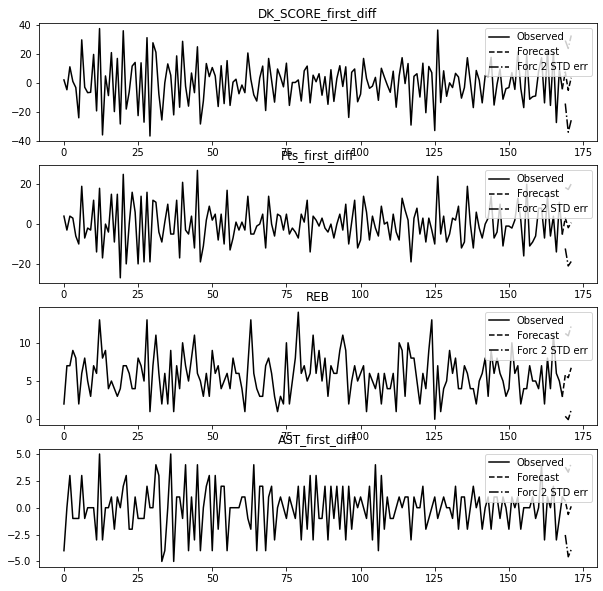

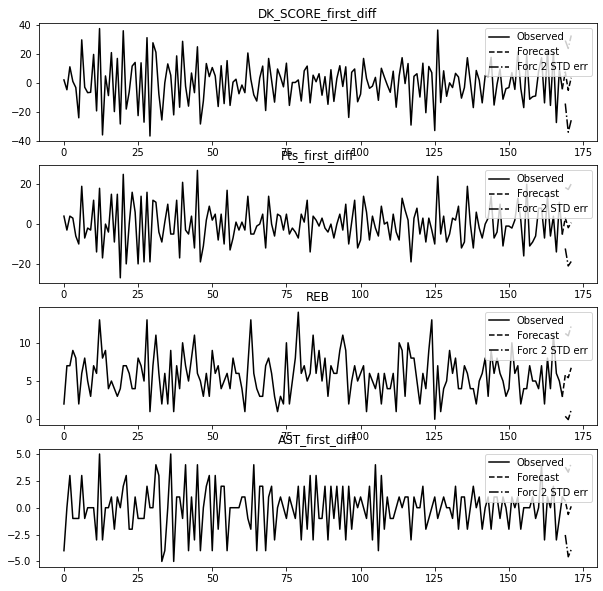

In [321]:
df_2 = df_2[['DK_SCORE_first_diff','Pts_first_diff','REB','AST_first_diff']]

df_2.dropna(inplace=True)
train, test = train_test_split(df_2,shuffle=False, test_size = .25)

model = VAR(train)

ts_model = model.fit(maxlags=5,ic='aic')

ts_model.plot_forecast(3)

In [322]:
forecast = ts_model.forecast(train.values, len(test))

for i in range(test.shape[1]):
    print(f'The test MSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i]), 2)}')

The test MSE on the DK_SCORE_first_diff data is: 205.31
The test MSE on the Pts_first_diff data is: 101.58
The test MSE on the REB data is: 9.04
The test MSE on the AST_first_diff data is: 5.27


In [323]:
ts_model.forecast(train.values, 1)

array([[7.42126829, 3.06244171, 5.80109143, 0.61933336]])